## Predictive Analytics using Statistics
### Arsh Mittal
### 101803614
### COE 28

#### Lab Evaluation 1
<br>
Dataset: Boston House Prices  
<br>
Dataset Link: https://www.kaggle.com/vikrishnan/boston-house-prices

In [2]:
## Importing the dataset
install.packages("ranger")
install.packages("caret")
install.packages("data.table")

Installing package into 'C:/Users/Arsh-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'lattice', 'Matrix', 'RcppEigen'




  There is a binary version available but the source version is later:
       binary source needs_compilation
Matrix  1.3-3  1.3-4              TRUE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'ranger' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Arsh-PC\AppData\Local\Temp\RtmpKiHM28\downloaded_packages


Installing package into 'C:/Users/Arsh-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'numDeriv', 'SQUAREM', 'colorspace', 'cli', 'utf8', 'KernSmooth', 'lava', 'farver', 'labeling', 'munsell', 'R6', 'RColorBrewer', 'viridisLite', 'fansi', 'pillar', 'pkgconfig', 'vctrs', 'stringi', 'rpart', 'survival', 'nnet', 'class', 'prodlim', 'cpp11', 'glue', 'gtable', 'isoband', 'MASS', 'mgcv', 'rlang', 'scales', 'tibble', 'codetools', 'iterators', 'data.table', 'stringr', 'dplyr', 'ellipsis', 'generics', 'gower', 'ipred', 'lifecycle', 'lubridate', 'magrittr', 'purrr', 'tidyr', 'tidyselect', 'timeDate', 'ggplot2', 'foreach', 'plyr', 'ModelMetrics', 'nlme', 'reshape2', 'recipes', 'withr', 'pROC'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
fansi    0.4.2  0.5.0              TRUE
pillar   1.6.0  1.6.1             FALSE
stringi  1.6.1  1.6.2              TRUE
mgcv    1.8-35 1.8-36              TRUE
tibble   3.1.1  3.1.2              TRUE
caret   6.0-86 6.0-88              TRUE

  Binaries will be installed
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'KernSmooth' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package '

installing the source package 'pillar'

Installing package into 'C:/Users/Arsh-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Arsh-PC\AppData\Local\Temp\RtmpKiHM28\downloaded_packages


In [65]:
library(ranger)
library(caret)
library(data.table)
housing <- read.csv("Boston.csv")

In [66]:
## Exploration
dim(housing)
head(housing)

[1] 506  15

X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [18]:
names(housing)

[1] "X"       "crim"    "zn"      "indus"   "chas"    "nox"     "rm"     
 [8] "age"     "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"  
[15] "medv"

In [28]:
summary(housing)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [20]:
var(housing$medv)
sd(housing$medv)

[1] 84.58672

[1] 9.197104

In [22]:
housing = subset(housing, select = -c(X))

In [24]:
head(housing)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [25]:
sum(is.na(housing))
sum(duplicated(housing))

[1] 0

[1] 0

In [26]:
cor(housing, housing$medv)

crim,-0.3883046
zn,0.3604453
indus,-0.4837252
chas,0.1752602
nox,-0.4273208
rm,0.6953599
age,-0.3769546
dis,0.2499287
rad,-0.3816262
tax,-0.4685359
ptratio,-0.5077867


In [29]:
## Scaling
housing$medv = scale(housing$medv)

In [30]:
newd = housing[, -c(1)]
head(newd)

zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0.1595278
0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,-0.1014239
0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1.3229375
0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1.1815886
0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1.4860323
0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,0.6705582


In [40]:
## Splitting Train & Test Data
# install.packages("caTools")
library(caTools)
set.seed(123)
data_sample = sample.split(housing$medv,SplitRatio=0.80)
train_data = subset(housing,data_sample==TRUE)
test_data = subset(housing,data_sample==FALSE)
dim(train_data)
dim(test_data)

[1] 434  14

[1] 72 14

In [41]:
## Simple Linear Regression
fitl = lm(medv~lstat, data = train_data)

In [45]:
## Prediction
predl = predict(fitl, newdata = test_data)

rmsel = sqrt((sum(predl - test_data$medv)^2)/length(test_data$medv))

c(RMSE = rmsel, R2 = summary(fitl)$r.squared)

RMSE        R2 
0.9198919 0.5710399

In [52]:
# library(car)
summary(fitl)


Call:
lm(formula = medv ~ lstat, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6789 -0.4438 -0.1430  0.2394  2.4169 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.360550   0.064621   21.05   <2e-16 ***
lstat       -0.106308   0.004433  -23.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.673 on 432 degrees of freedom
Multiple R-squared:  0.571,	Adjusted R-squared:   0.57 
F-statistic: 575.1 on 1 and 432 DF,  p-value: < 2.2e-16


In [54]:
## Random Forest
suppressMessages(library(randomForest))
set.seed(12345)
fit.rf <- randomForest(formula = medv ~ ., data = train_data)

set.seed(12345)
pred.rf <- predict(fit.rf, test_data)

rmse.rf <- sqrt(sum(((pred.rf) - test_data$medv)^2)/
                   length(test_data$medv))
c(RMSE = rmse.rf, R2 = mean(fit.rf$rsq))

RMSE        R2 
0.5794413 0.8842314

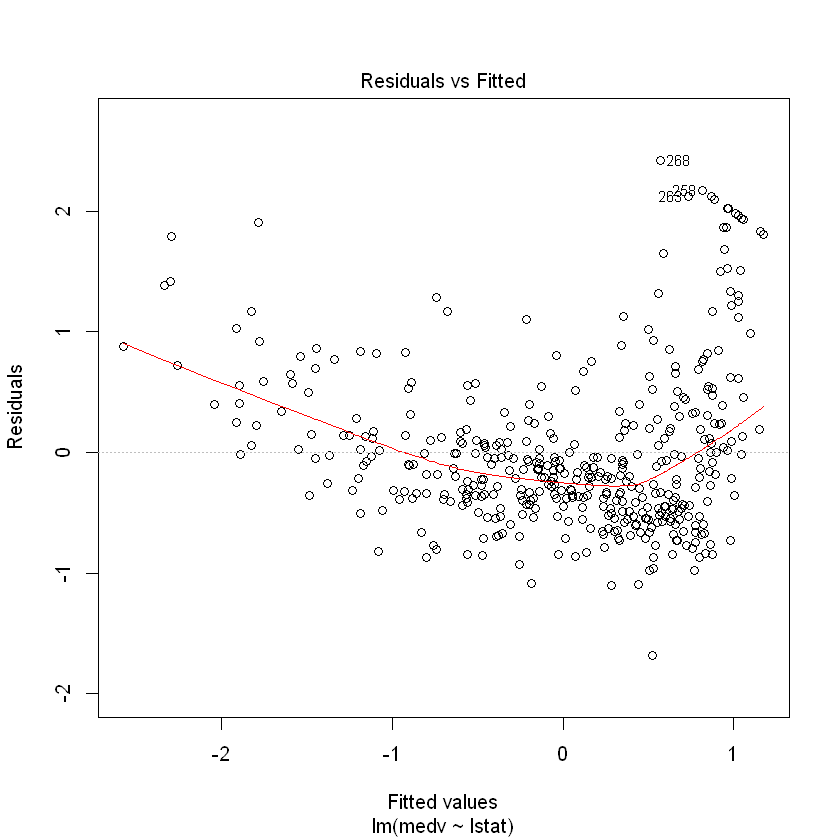

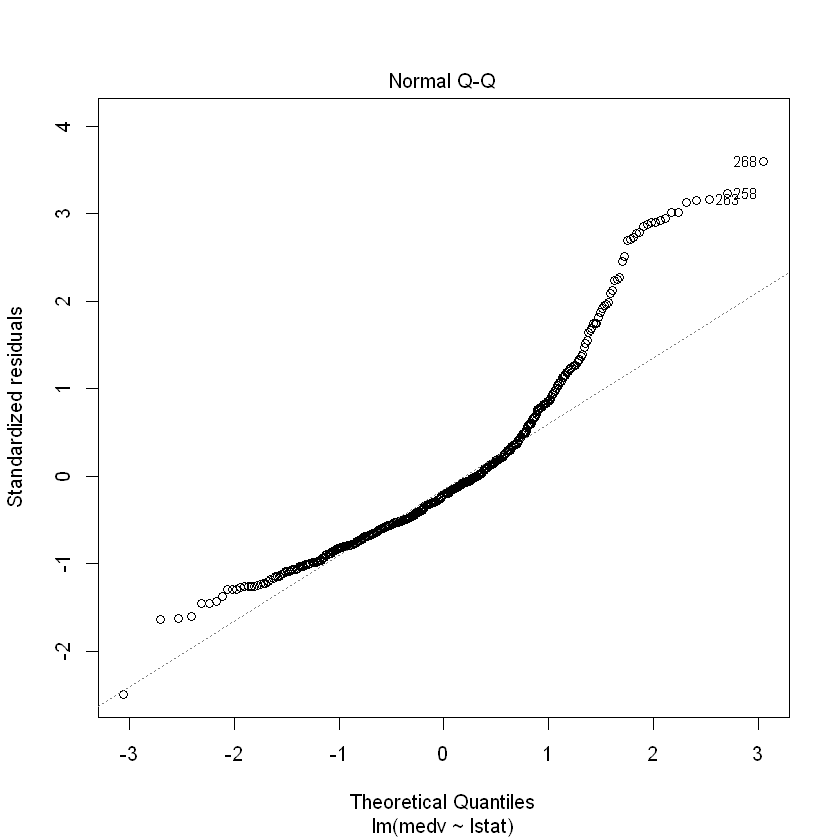

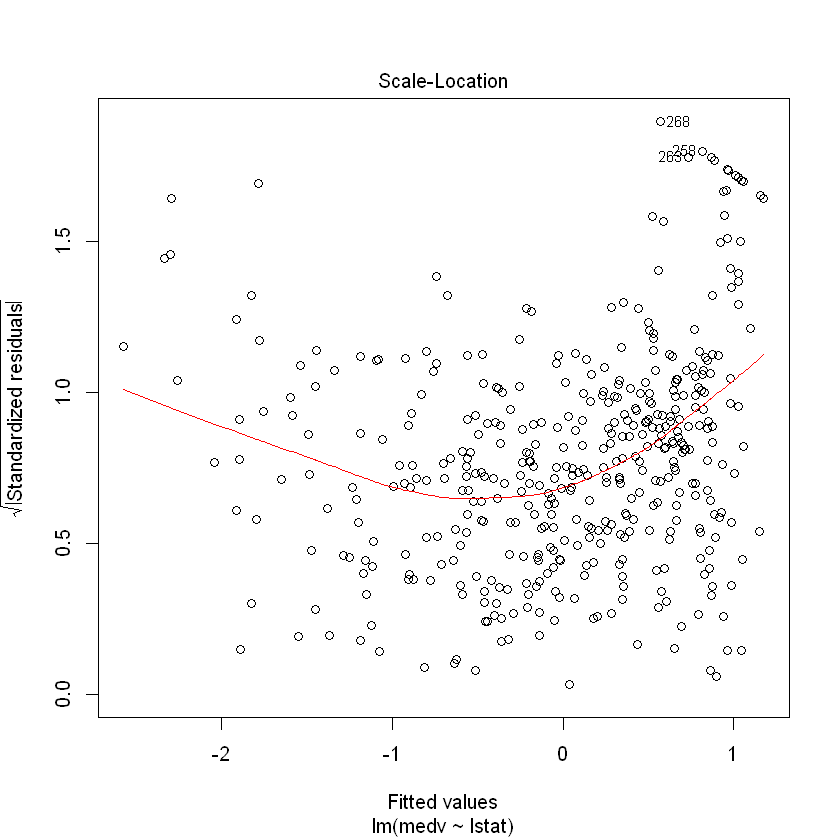

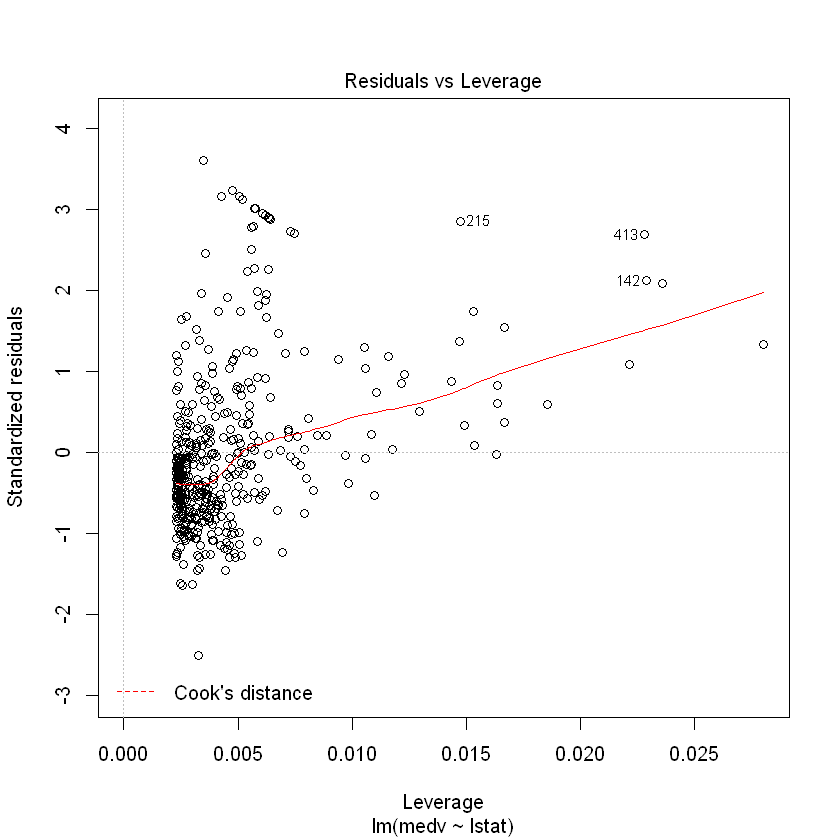

In [55]:
plot(fitl)

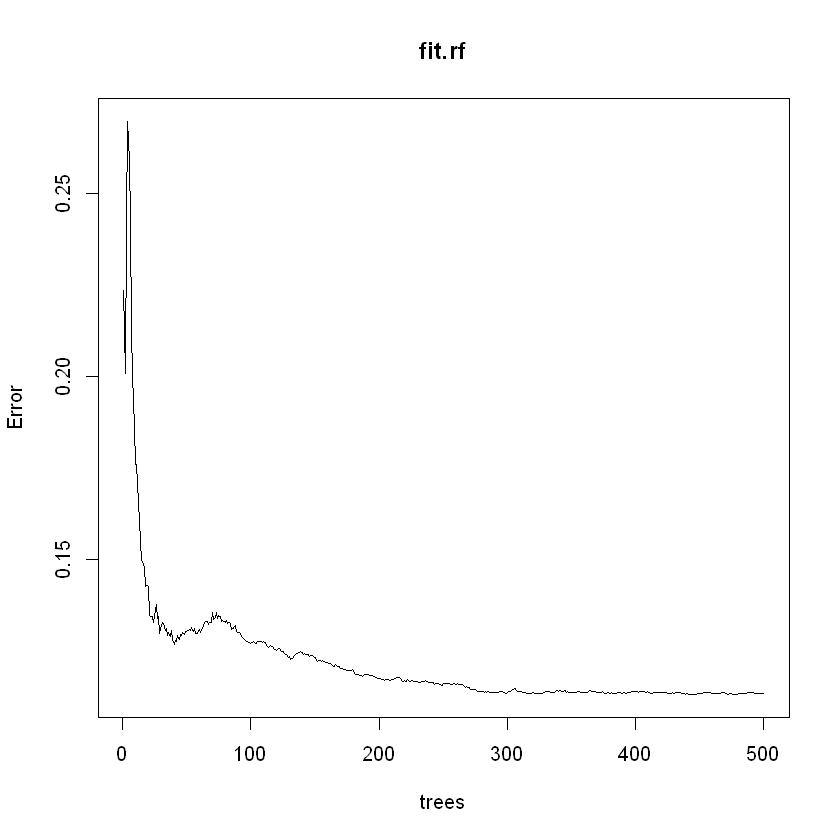

In [56]:
plot(fit.rf)

corrplot 0.89 loaded


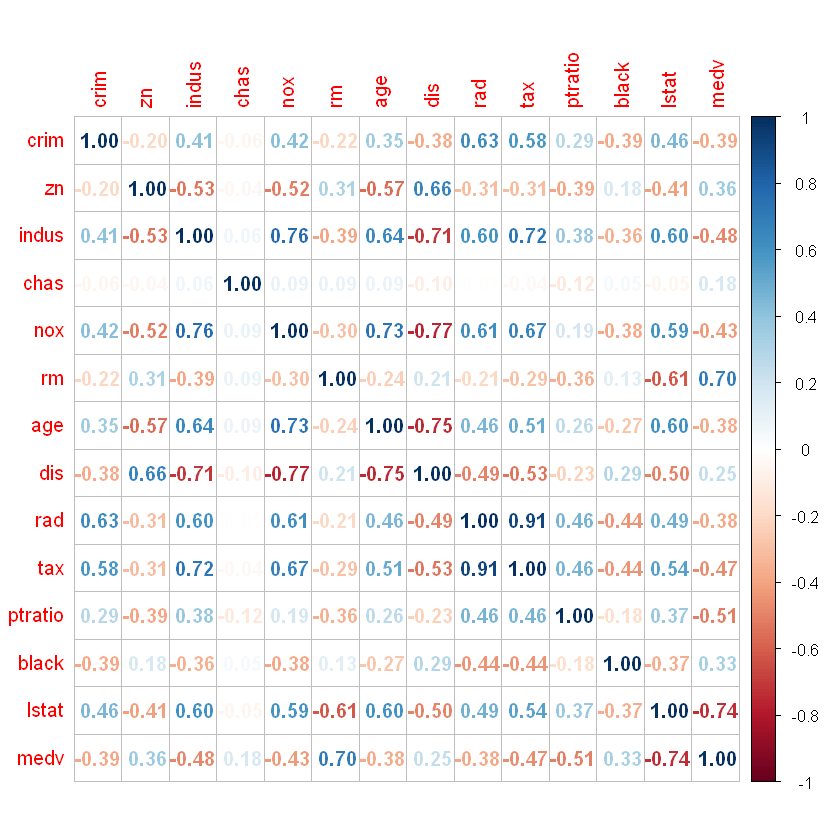

In [58]:
## Visualisations
library(corrplot)

M <- cor(housing)
corrplot(M, method = "number")

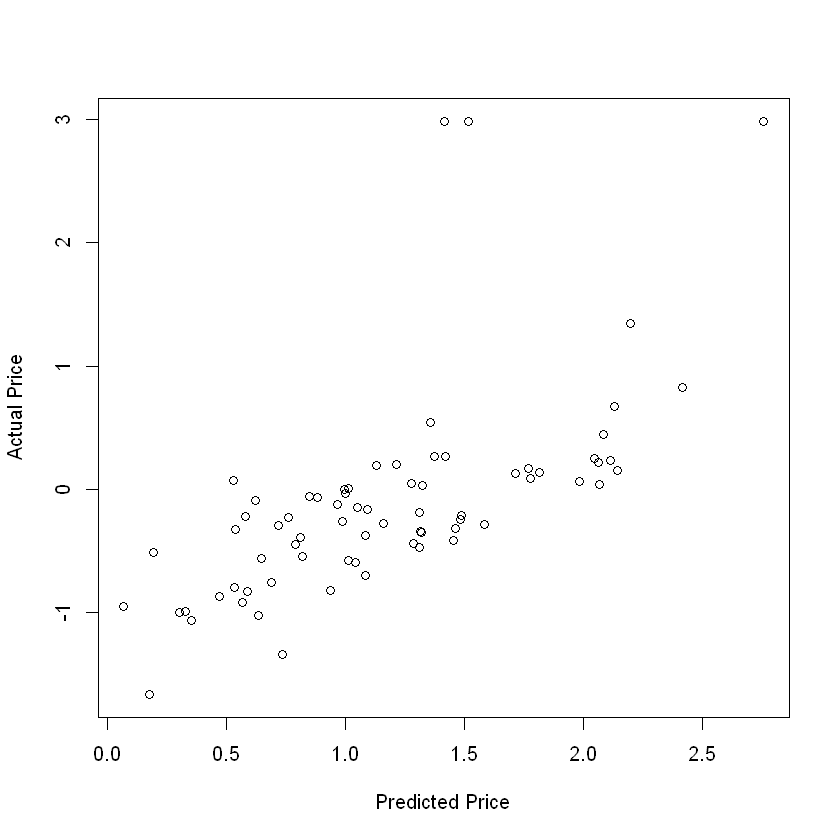

In [59]:
plot(exp(predl),test_data$medv, xlab = "Predicted Price", ylab = "Actual Price")

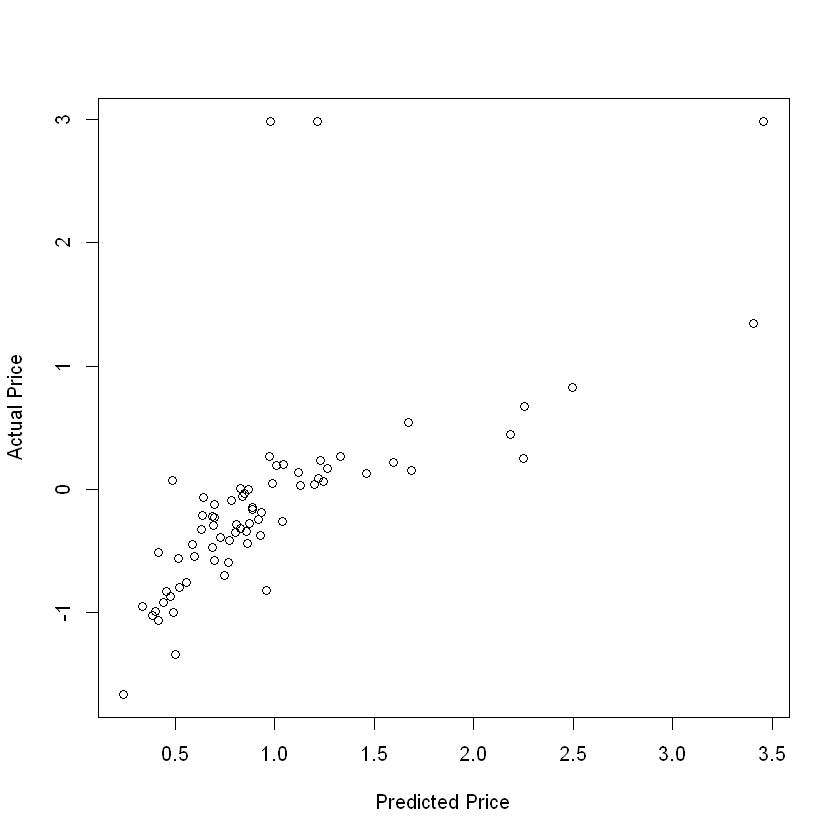

In [60]:
plot(exp(pred.rf),test_data$medv, xlab = "Predicted Price", ylab = "Actual Price")

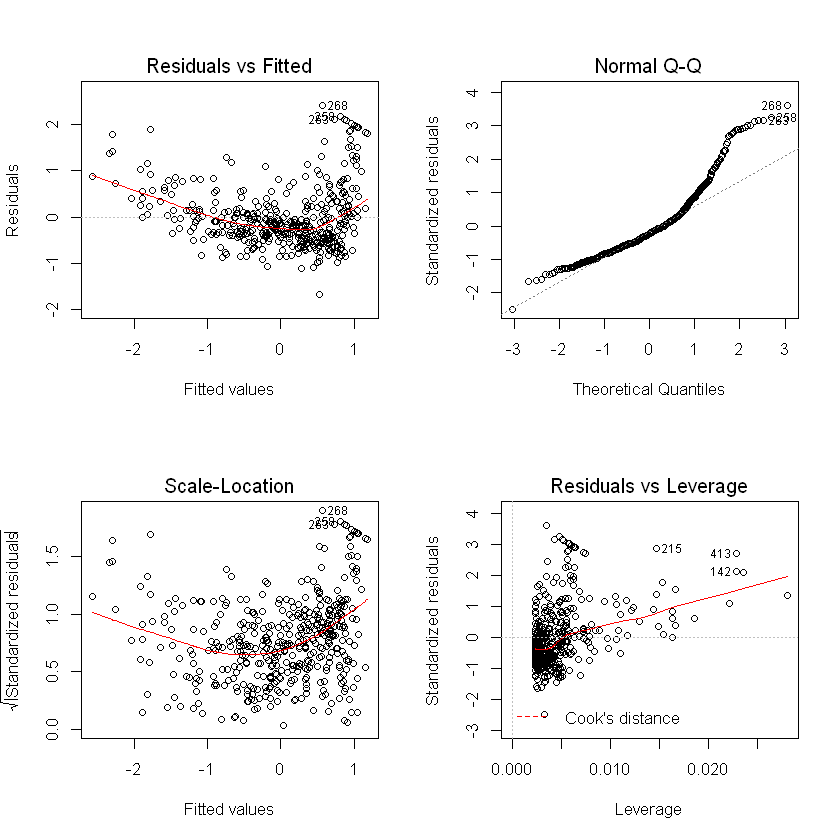

In [61]:
par(mfrow = c(2,2))
plot(fitl)

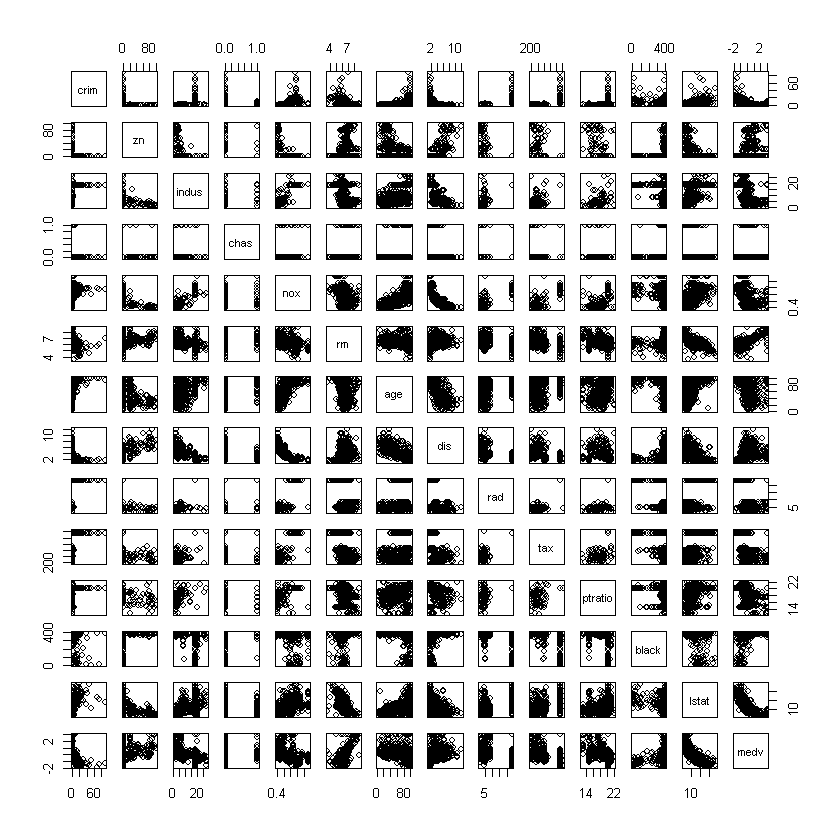

In [64]:
plot(housing)

## End of Report